In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is B841-0E2D

 Directory of C:\Users\SANVI\Documents\ExelR Assignment\Linear

27-04-2022  08.58 PM    <DIR>          .
27-04-2022  08.58 PM    <DIR>          ..
27-04-2022  08.58 PM    <DIR>          .ipynb_checkpoints
20-04-2022  09.29 PM               218 delivery_time.csv
27-04-2022  08.56 PM            73,905 Linear Reg.ipynb
27-04-2022  08.57 PM                72 linear_reg_salary.ipynb
20-04-2022  09.29 PM               318 Problem_statements.txt
20-04-2022  09.29 PM               454 Salary_Data.csv
               5 File(s)         74,967 bytes
               3 Dir(s)  103,084,625,920 bytes free


In [3]:
salary_df = pd.read_csv("Salary_Data.csv")

In [4]:
salary_df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
salary_df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
salary_df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Text(0, 0.5, 'Salary')

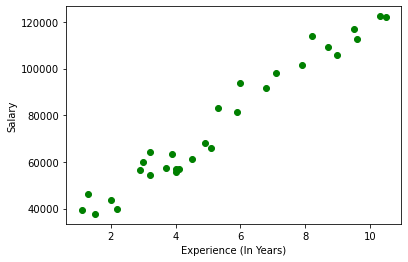

In [11]:
plt.scatter(x= salary_df.YearsExperience, y = salary_df.Salary, color='green')
plt.xlabel("Experience (In Years)")
plt.ylabel("Salary")

{'whiskers': [<matplotlib.lines.Line2D at 0x1db3c0bd0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1db3c0bd790>,
 'boxes': [<matplotlib.lines.Line2D at 0x1db3c0aad30>],
 'medians': [<matplotlib.lines.Line2D at 0x1db3c0bde50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1db3c0c91f0>],
 'means': []}

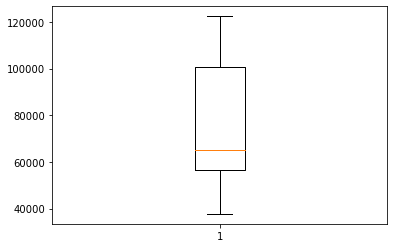

In [12]:
plt.boxplot(salary_df.Salary)

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

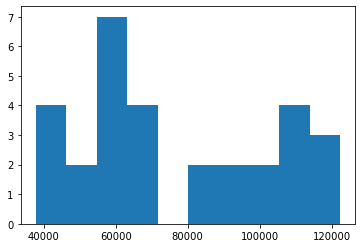

In [15]:
plt.hist(salary_df.Salary, bins=10)

In [16]:
model_1 = smf.ols("Salary~YearsExperience",data=salary_df).fit()

In [17]:
model_1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [18]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           1.14e-20
Time:                        21:18:11   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model_1.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,21136.061314,30448.339084
YearsExperience,8674.118747,10225.805896


In [20]:
pred_1 = model_1.predict(salary_df) # Predicted values of dt using the model

Text(0, 0.5, 'Salary')

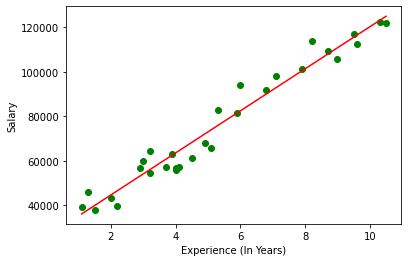

In [21]:
plt.scatter(x=salary_df.YearsExperience, y=salary_df.Salary, color='green')
plt.plot(salary_df.YearsExperience, pred_1, color='red')
plt.xlabel("Experience (In Years)")
plt.ylabel("Salary")

In [22]:
model_2 = smf.ols("Salary~np.log(YearsExperience)", data=salary_df).fit()

In [23]:
model_2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [24]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           3.25e-13
Time:                        21:28:41   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model_2.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,4365.921305,25490.022235
np.log(YearsExperience),34083.511736,47080.464184


In [26]:
pred_2 = model_2.predict(salary_df) # Predicted values of dt using the model

Text(0, 0.5, 'Salary')

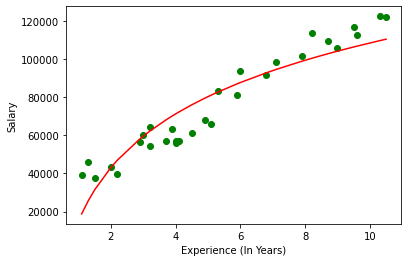

In [28]:
plt.scatter(x=salary_df.YearsExperience, y=salary_df.Salary, color='green')
plt.plot(salary_df.YearsExperience, pred_2, color='red')
plt.xlabel("Experience (In Years)")
plt.ylabel("Salary")